In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [123]:
df = pd.read_csv('datasets/dataset_train.csv')
df.drop('Index',
		axis=1,
		inplace=True)

In [124]:
courses = df.columns[5:]

In [125]:
houses = ['Hufflepuff', 'Ravenclaw', 'Slytherin']

In [126]:
dist_comp = pd.DataFrame(index = range(len(courses)),
                        columns=range(len(houses)))

In [127]:
dist_comp.columns = houses
dist_comp.index = courses

In [128]:
for house in range(len(houses)):
	for course in range(len(courses)):
		dist_comp.iloc[course, house] = ks_2samp(df[courses[course]][df['Hogwarts House'] == 'Gryffindor'], df[courses[course]][df['Hogwarts House'] == houses[house]]).pvalue

In [130]:
dist_comp

,Hufflepuff,Ravenclaw,Slytherin
Arithmancy,0.48023178,0.10635805,0.77752973
Astronomy,0.82186846,0.0,0.0
Herbology,0.0,0.0,0.3169707
Defense Against the Dark Arts,0.679594,0.0,0.0
Divination,0.087405,0.20246058,0.0
Muggle Studies,0.28079279,0.0,0.00812605
Ancient Runes,0.0,0.63592098,0.0
History of Magic,0.0,0.0,0.0
Transfiguration,0.0,0.0,0.0
Potions,0.0,0.0,0.0


In [131]:
courses2 = ['Arithmancy', 'Care of Magical Creatures']

In [132]:
houses2 = ['Ravenclaw', 'Slytherin']

In [133]:
dist_comp2 = pd.DataFrame(index = range(len(courses2)),
                        columns=range(len(houses2)))
dist_comp2.columns = houses2
dist_comp2.index = courses2

In [134]:
for house in range(len(houses2)):
	for course in range(len(courses2)):
		dist_comp2.iloc[course, house] = ks_2samp(df[courses2[course]][df['Hogwarts House'] == 'Hufflepuff'], df[courses2[course]][df['Hogwarts House'] == houses2[house]]).pvalue

In [135]:
dist_comp2

,Ravenclaw,Slytherin
Arithmancy,0.14296928,0.53540244
Care of Magical Creatures,0.70814244,0.32733672


In [139]:
dist_comp3 = pd.DataFrame(index = range(len(courses2)),
                        columns=range(1))
dist_comp3.columns = ['Slytherin']
dist_comp3.index = courses2

In [140]:
for course in range(len(courses2)):
	dist_comp3.iloc[course, 0] = ks_2samp(df[courses2[course]][df['Hogwarts House'] == 'Ravenclaw'], df[courses2[course]][df['Hogwarts House'] == 'Slytherin']).pvalue

In [141]:
dist_comp3

,Slytherin
Arithmancy,0.30155838
Care of Magical Creatures,0.44462004


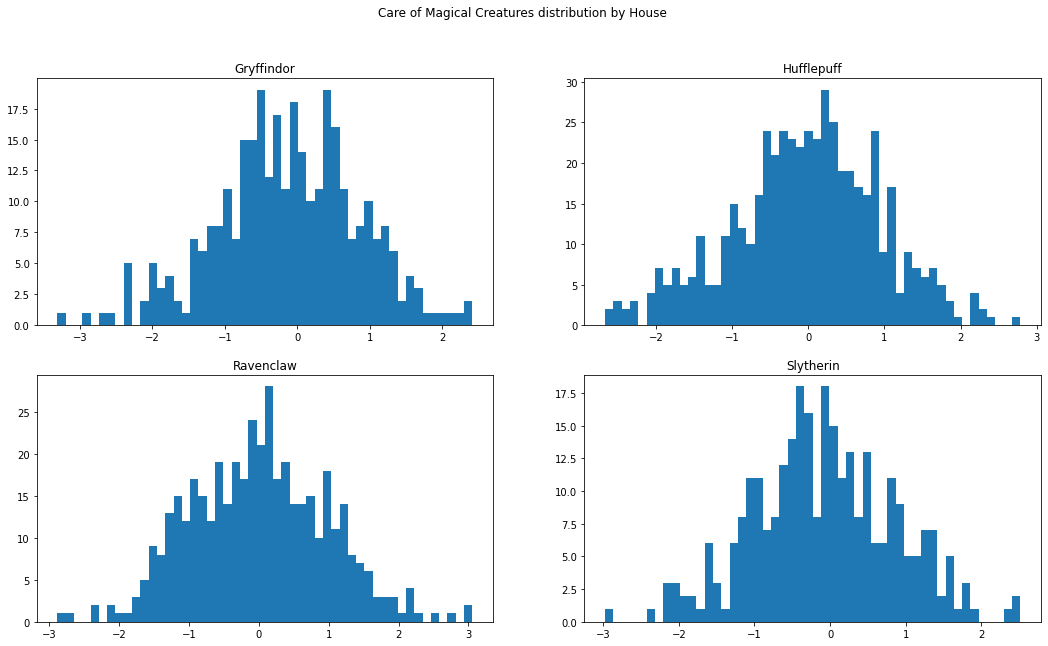

In [164]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
ax0.hist(df['Care of Magical Creatures'][df['Hogwarts House'] == 'Gryffindor'], 50, histtype='bar')
ax0.set_title('Gryffindor')
ax1.hist(df['Care of Magical Creatures'][df['Hogwarts House'] == 'Hufflepuff'], 50, histtype='bar')
ax1.set_title('Hufflepuff')
ax2.hist(df['Care of Magical Creatures'][df['Hogwarts House'] == 'Ravenclaw'], 50, histtype='bar')
ax2.set_title('Ravenclaw')
ax3.hist(df['Care of Magical Creatures'][df['Hogwarts House'] == 'Slytherin'], 50, histtype='bar')
ax3.set_title('Slytherin')
fig.set_size_inches(18, 10)
fig.suptitle('Care of Magical Creatures distribution by House');